In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
def mape(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

In [4]:
df = pd.read_csv('CER_Resident_Power_556.csv')
print(df)
train = df.loc[:,['holidays', 'Hour', 'Days', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
target = df["Power"]
print(train.head)
print(target.head)
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.01305,random_state=42)

mm = MinMaxScaler()
ss = StandardScaler()
X_train = mm.fit_transform(x_train)
X_test = mm.transform(x_test)
print(len(X_train), len(X_test))


       Unnamed: 0   Date    Power  Timepoint  holidays  Hour  Days  Month  \
0               0  19501  184.337          1         0   0.0    14      7   
1               1  19502  162.016          2         0   0.5    14      7   
2               2  19503  140.663          3         0   1.0    14      7   
3               3  19504  128.021          4         0   1.5    14      7   
4               4  19505  117.371          5         0   2.0    14      7   
...           ...    ...      ...        ...       ...   ...   ...    ...   
25723       25723  73044  449.379         44         1  21.5    31     12   
25724       25724  73045  424.161         45         1  22.0    31     12   
25725       25725  73046  411.036         46         1  22.5    31     12   
25726       25726  73047  407.593         47         1  23.0    31     12   
25727       25727  73048  376.131         48         1  23.5    31     12   

       Temperature  humiduity  Wind_speed  
0            11.80       93.0  

/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Power', ylabel='Density'>

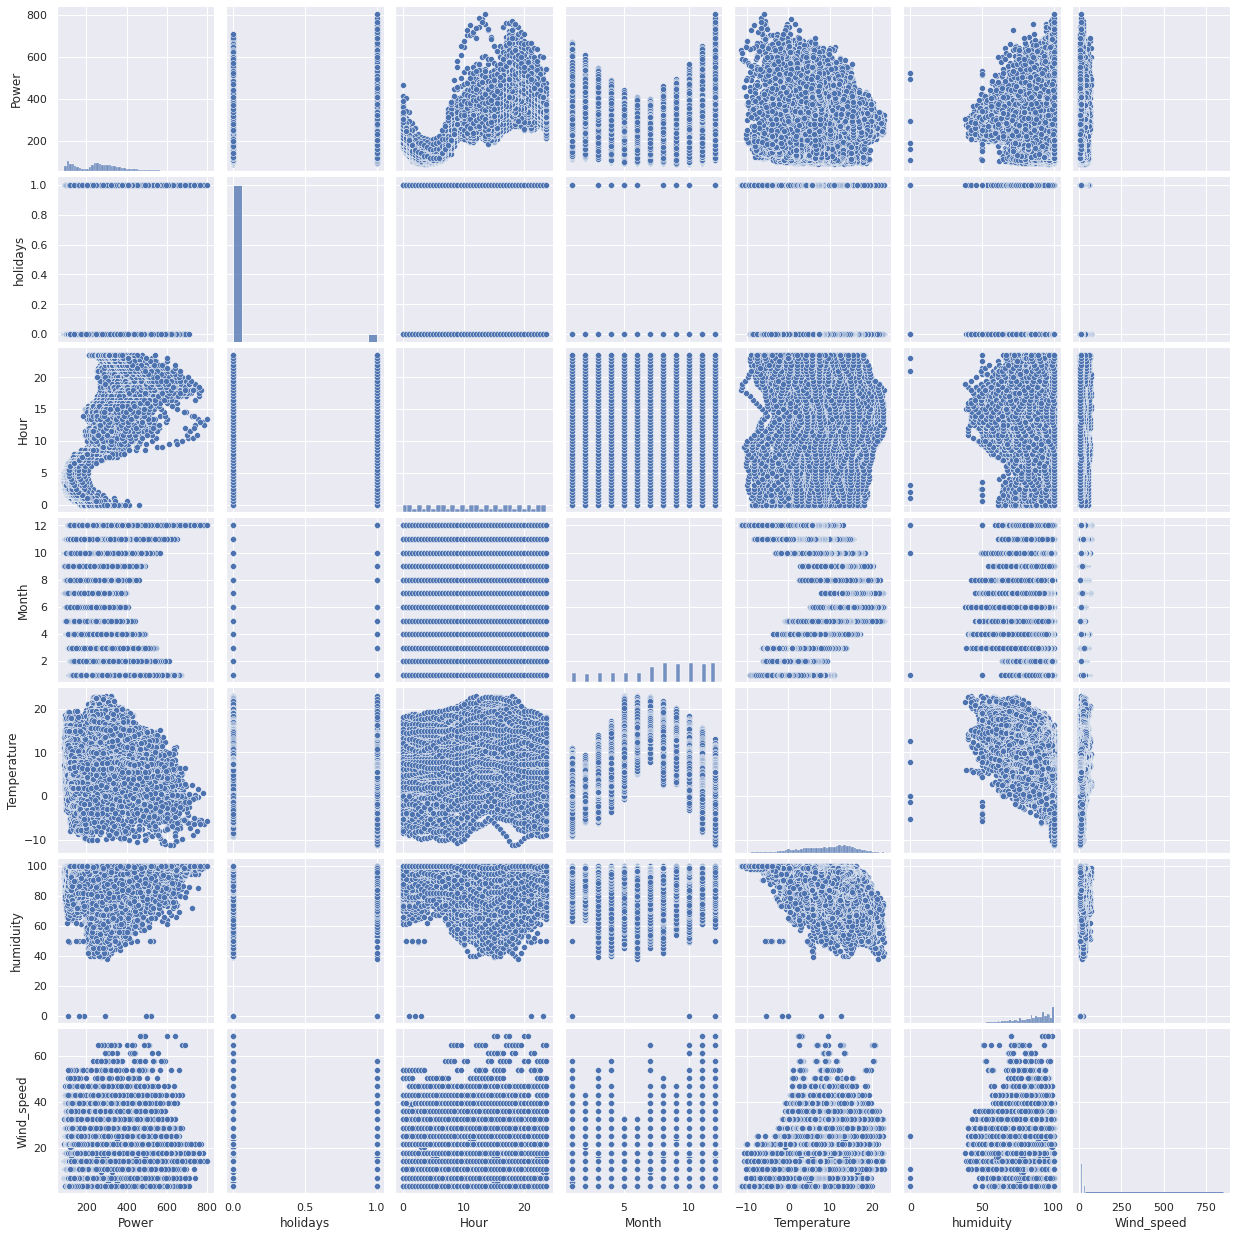

In [6]:
df = df.loc[:,['Power', 'holidays', 'Hour', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
sns.pairplot(df)
sns.distplot(df['Power'])

/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


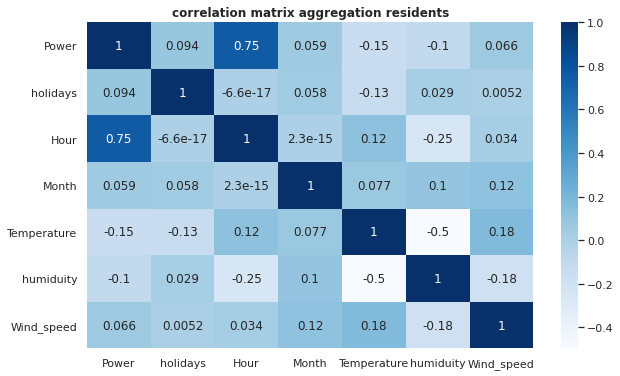

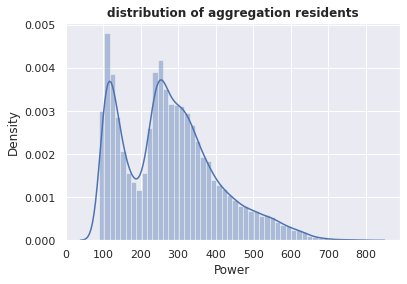

In [7]:
font1 = {
        'weight':'bold',
        'size':12,}

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues',annot=True)
plt.title('correlation matrix aggregation residents', font1)
plt.savefig('correlation matrix for aggregation residents')

plt.figure(figsize=(6,4))
plt.title('distribution of aggregation residents', font1)
sns.distplot(df['Power'])
plt.savefig('distribution of aggreagation residents')

In [8]:
from sklearn.model_selection import RandomizedSearchCV
param_distribs= {
    "C": np.arange(1, 2000).tolist(),
    "gamma": np.arange(1,500).tolist(),
}
RS_SVR =RandomizedSearchCV(SVR(kernel='rbf'),param_distribs, refit=True, cv=5, verbose=1, n_jobs=15)
RS_SVR.fit(X_train, y_train)
pd.DataFrame(RS_SVR.cv_results_)
print('score:', RS_SVR.best_score_)
print(RS_SVR.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
'''
score: 0.9718199828860314
{'gamma': 60, 'C': 1126}
score: 0.9718997220095735
{'gamma': 70, 'C': 862 13.60575558400761 0.05093758384628823
score: 0.969406644487043
{'gamma': 70, 'C': 1597}
score: 0.9730707784820373
{'gamma': 41, 'C': 1717}
12.885113435036917
0.04827616850263923
'''
params = [{'gamma':[43, 44, 45, 46],'C':[950, 1000, 1050]}]
GS_SVR = GridSearchCV(SVR(kernel='rbf'), param_grid = params, refit=True, cv=5, verbose=1, n_jobs=15)
GS_SVR.fit(X_train, y_train)
pd.DataFrame(GS_SVR.cv_results_)
print('score:', GS_SVR.best_score_, GS_SVR.best_params_)

In [9]:
rbf_svr = SVR(kernel = 'rbf', gamma=41, C=1717)
rbf_svr.fit(X_train, y_train)
rbf_svr_y_pred = rbf_svr.predict(X_test)
print(metrics.mean_absolute_error(y_test, rbf_svr_y_pred))
print(metrics.mean_absolute_percentage_error(y_test,rbf_svr_y_pred))


14.238139806163247
0.048543232325736166


Test RMSE: 25.509
Test MAE: 14.238
Test MAPE: 0.049


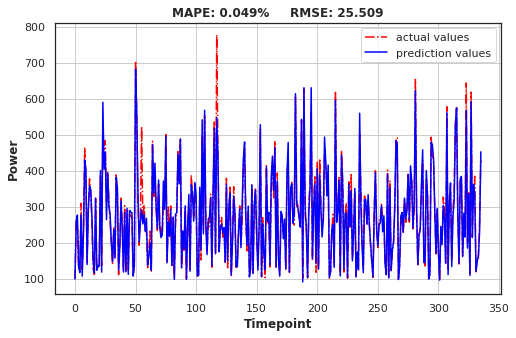

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mae = metrics.mean_absolute_error(y_test, rbf_svr_y_pred)
mape = metrics.mean_absolute_percentage_error(y_test,rbf_svr_y_pred)
rmse = rmse = sqrt(mean_squared_error(y_test,rbf_svr_y_pred))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

sns.set_style('white')
font1 = {
        'weight':'bold',
        'size':12,}
plt.figure(figsize=(8, 5))
plt.plot(range(len(y_test)), y_test, ls='-.', c='red', label='actual values')
plt.plot(range(len(rbf_svr_y_pred)), rbf_svr_y_pred, ls='-', c='blue', label='prediction values')
plt.grid(True)
plt.legend()
plt.title('MAPE: %.3f%%' % mape + '     ' + 'RMSE: %.3f' % rmse, font1)
plt.xlabel('Timepoint', font1)
plt.ylabel('Power', font1)
plt.savefig('SVR_residents_results')
plt.show()